In [11]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Benefits of recursive functions - mathematical elegance, readability, good for certain structures like traversing trees (ex: JSON/XML) and things that require backtracking (why??). Also good for working with asynchronous code. Ex: have 10 jobs, need to run in a specific order but asynch. With recursion, make each job enqueue next job when finished. Harder to do iteratively. Would need to instead use "polling" technique where pause and check to se which job is done. Inefficient and unwieldy

Cons of recursive functions - lots of function call overhead to the stack.
TODO: look up memoization and tail call elimination

Benefits of iterative functions - generally faster due to less function call overhead

In [42]:
# fibonacci seq
# 
# iterative, time complexity = O(n), space complexity = O(1) if don't keep the whole sequence
def fibonacci_iterative(n):
    a = 0
    b = 1
    seq = [a,b]
    for i in range(n):
        #print("a = ",a, "b= ", b, "a+b=", a+b)
        seq.append(a+b) # this is the entire sequence up to fib(N) -> O(n) complexity
        temp=a
        a=b
        b=temp+b # this guy is the Nth element -> O(1) space complexity
    return seq, a

# recursive, time complexity = O(n^2) [jaysus], space complexity = ... why does geeksforgeeks call it auxiliary space = O(n)
# It's O(n) = number of stack frames = recursion depth. PS, the function calls are executed SEQUENTIALLY. 
# This guarantees stack size can never exceed depth of call tree
def fibonacci_recursive(n):
    #print("Calling n = ",n)
    if n<=1:
        return n
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)
    
def fib_rec_with_stack(n,stack):
    print("n = ", n, " stack = ", stack)
    if n<=1:
        return n
    else: 
        return fib_rec_with_stack(n-1,stack+1) + fib_rec_with_stack(n-2,stack+1)

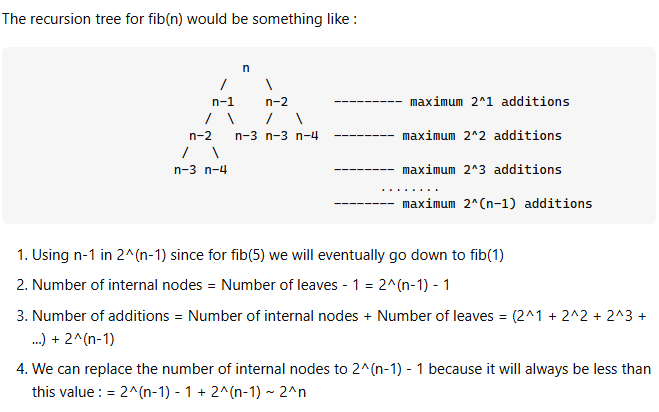

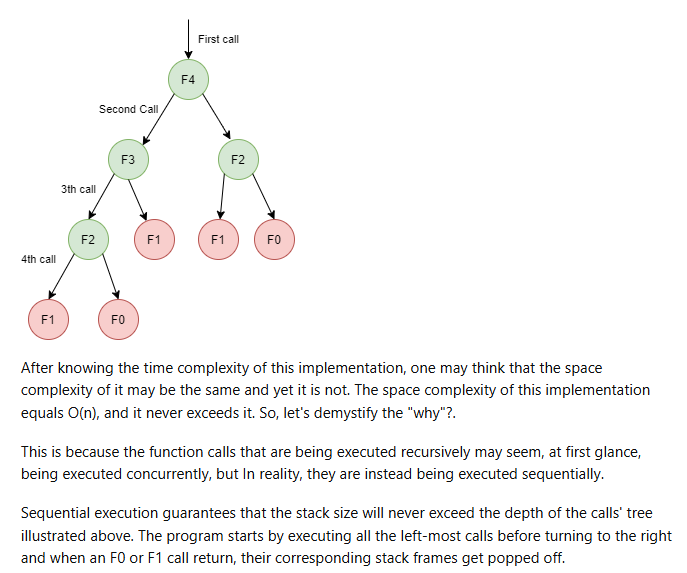

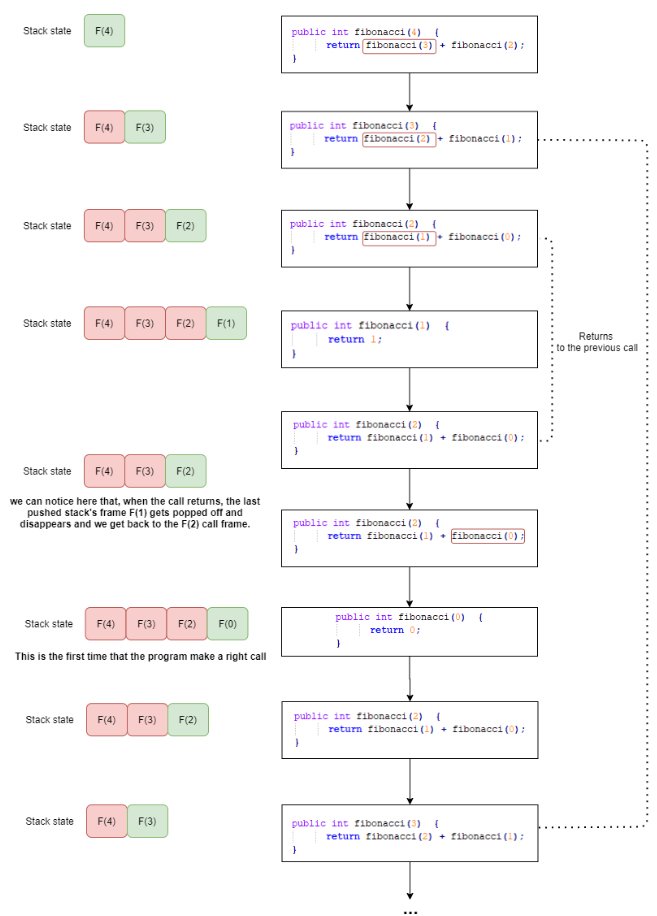

In [37]:
fibonacci_iterative(n=10)

([0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89], 55)

In [38]:
fibonacci_recursive(n=10)

55

In [41]:
fib_rec_with_stack(n=10,stack=1)

n =  10  stack =  1
n =  9  stack =  2
n =  8  stack =  3
n =  7  stack =  4
n =  6  stack =  5
n =  5  stack =  6
n =  4  stack =  7
n =  3  stack =  8
n =  2  stack =  9
n =  1  stack =  10
n =  0  stack =  10
n =  1  stack =  9
n =  2  stack =  8
n =  1  stack =  9
n =  0  stack =  9
n =  3  stack =  7
n =  2  stack =  8
n =  1  stack =  9
n =  0  stack =  9
n =  1  stack =  8
n =  4  stack =  6
n =  3  stack =  7
n =  2  stack =  8
n =  1  stack =  9
n =  0  stack =  9
n =  1  stack =  8
n =  2  stack =  7
n =  1  stack =  8
n =  0  stack =  8
n =  5  stack =  5
n =  4  stack =  6
n =  3  stack =  7
n =  2  stack =  8
n =  1  stack =  9
n =  0  stack =  9
n =  1  stack =  8
n =  2  stack =  7
n =  1  stack =  8
n =  0  stack =  8
n =  3  stack =  6
n =  2  stack =  7
n =  1  stack =  8
n =  0  stack =  8
n =  1  stack =  7
n =  6  stack =  4
n =  5  stack =  5
n =  4  stack =  6
n =  3  stack =  7
n =  2  stack =  8
n =  1  stack =  9
n =  0  stack =  9
n =  1  stack =  8
n =  2  s

55

Weird optimization time. Caching/"memoization" (terrible word btw)

In [48]:
#from functools import lru_cache
from functools import cache

In [49]:
# Stuff the decorator right above teh function of interst
# Time complexity = O(n) 
# Space complexity = O(n)
#@lru_cache(None)
@cache
def fib_rec_cache(n):
    if n <= 1:
        return n
    else:
        return fib_rec_cache(n-1) + fib_rec_cache(n-2)
fib_rec_cache(n=10)

55

In [52]:
# This is kinda dumb and looks lots like the cache and has the same time and space complexity
def fib_memo(n, memo={}):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    elif n in memo:
        return memo[n]
    else:
        memo[n] = fib_memo(n-1) + fib_memo(n-2)
        return memo[n]
fib_memo(10)

55

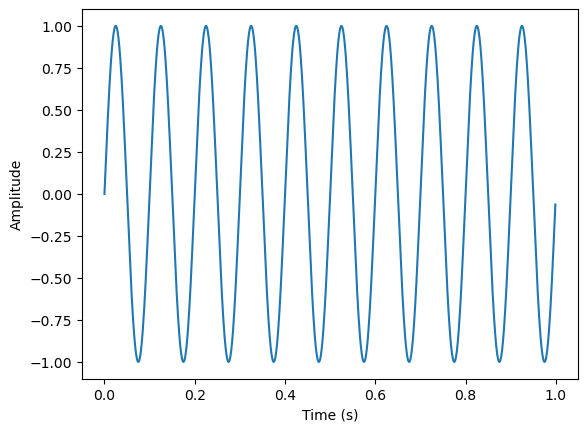

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000  # Sampling frequency -> does this mean f_nyquist = fs/2 = 500? What is the units
t = np.arange(0, 1, 1/fs)  # Time vector
f = 10  # Signal frequency
x = np.sin(2*np.pi*f*t)  # Sine wave

plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [3]:
x = np.array([1, 2, 3, 4])
h = np.array([0.5, 0.5])
y = np.convolve(x, h, 'same')  # Convolution with same size output
print(y)

[0.5 1.5 2.5 3.5]


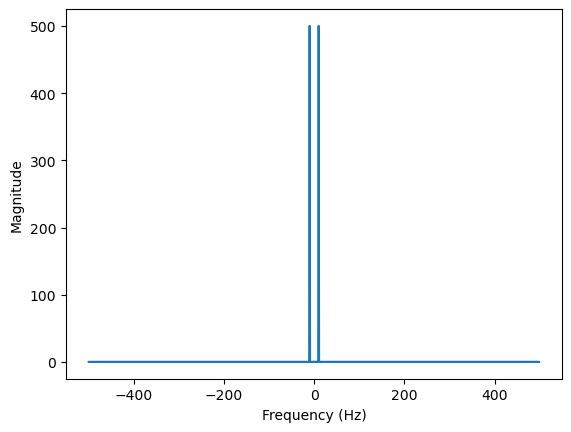

In [8]:
from scipy.fft import fft, fftfreq
    
fs = 1000
t = np.arange(0, 1, 1/fs)
f = 10
x = np.sin(2*np.pi*f*t)

X = fft(x)
freqs = fftfreq(len(x), 1/fs)

#plt.plot(freqs[:len(freqs)//2], np.abs(X)[:len(freqs)//2])
plt.plot(freqs, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [9]:
X

array([-7.04017456e-14-0.00000000e+00j,  1.25746650e-13+8.19728565e-14j,
       -2.27628054e-13+1.80858394e-13j, -1.21236383e-13-2.26587408e-13j,
       -5.54885911e-14+2.52413792e-14j,  4.51995579e-15-1.31948711e-13j,
        7.96022547e-14-7.16602060e-14j,  6.14968499e-16+1.06376805e-13j,
        4.87265796e-14-1.26705064e-14j, -1.50880216e-14+1.07370621e-13j,
       -2.61003751e-13-5.00000000e+02j,  1.21991785e-14-7.31916719e-14j,
        3.28404166e-14-6.14807118e-14j,  1.20680175e-14+3.58295224e-14j,
       -2.68092023e-14+4.51794443e-14j, -6.35454624e-14-1.12904798e-14j,
        8.20331658e-15-4.97282842e-15j, -1.54000166e-13+1.44468236e-13j,
       -2.32393867e-13-1.79109365e-13j,  9.14801554e-14-1.21555768e-13j,
       -1.59031077e-14-3.00639293e-14j, -4.60519926e-14-3.26797532e-14j,
       -2.45086932e-14-9.31587485e-14j, -2.51353375e-14-1.00775176e-13j,
       -6.87131484e-14+2.88507348e-14j,  7.91477453e-14-1.53980010e-13j,
        7.78870584e-14-1.20419433e-13j,  2.20355858

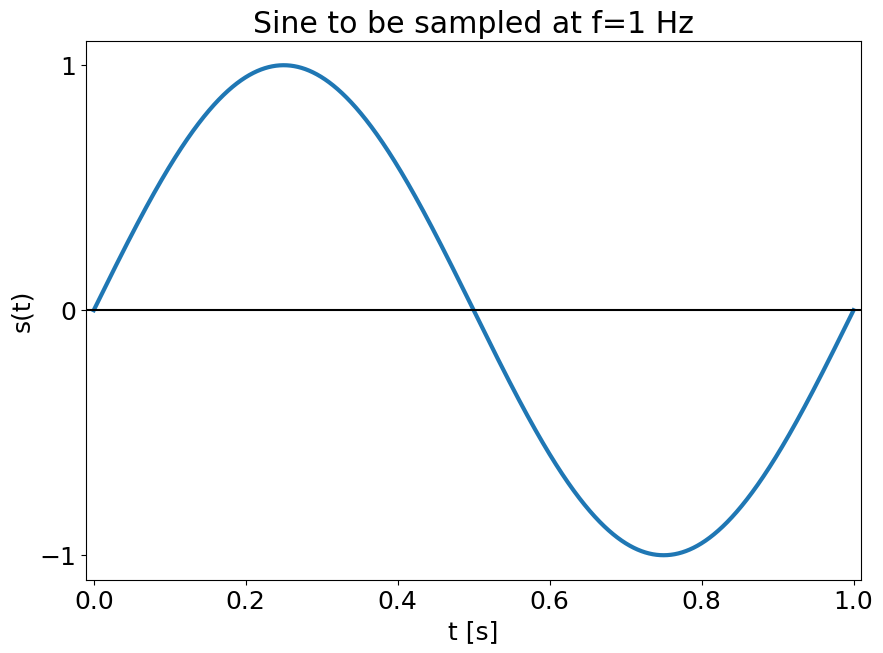

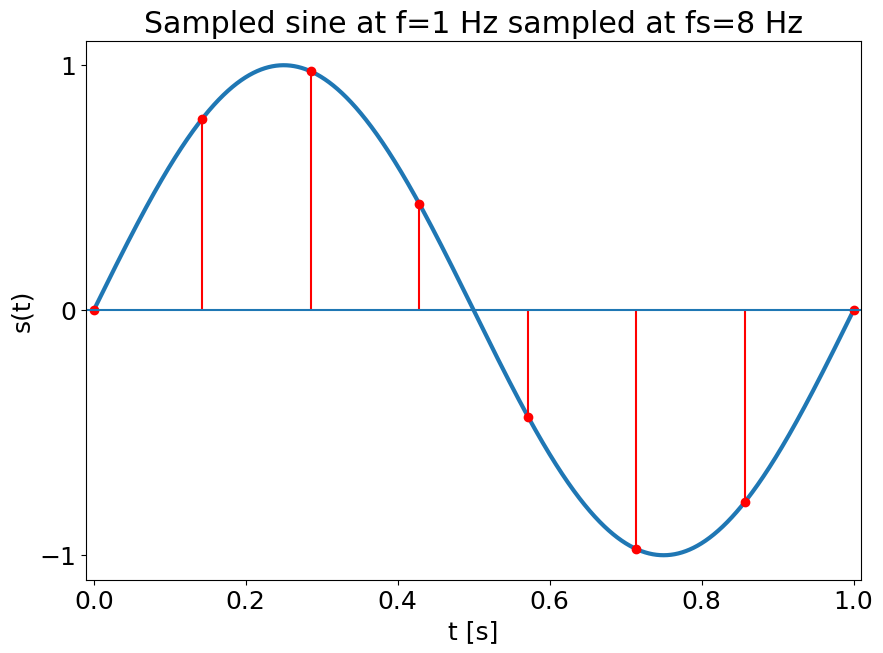

In [10]:
#!/usr/bin/env python3
"""Example of sine sampling"""
import numpy as np
import matplotlib.pyplot as plt
__author__  = "Jan Wilczek"
__license__ = "GPL"
__version__ = "1.0.0"

# Plotting parameters
plt.rcParams.update({'font.size': 18})
xlim = [-0.01, 1.01]
yticks = [-1.0, 0.0, 1.0]

def signal(A, f, t):
    """
    :param A: amplitude
    :param f: frequency in Hz
    :param t: time in s
    :return: sine with amplitude A at frequency f over time t
    """
    return A * np.sin(2 * np.pi * f * t)

# Observed signal's parameters
A = 1       # amplitude
f = 1       # frequency of the observed signal in Hz
fs = 48000  # basic sampling rate in Hz, to make observed signal seem "continuous"

# Signal's generation
t = np.linspace(0, 1, fs)   # "continuous" time in s
s_t = signal(A, f, t)

plt.figure(figsize=(10,7))
plt.title(f'Sine to be sampled at f={f} Hz')
plt.plot(t, s_t, linewidth=3)
plt.hlines(0, xmin=xlim[0], xmax=xlim[1], colors='black')
plt.xlim(xlim)
plt.xlabel('t [s]')
plt.ylabel('s(t)')
plt.yticks(yticks)
plt.show()

# The sample rate we are sampling the observed signal with
sample_rate = 8     # Hz

# Actual sampling
sampled_time = np.linspace(0, 1, sample_rate)
sampled_signal = signal(A, f, sampled_time)

plt.figure(figsize=(10,7))
plt.title(f'Sampled sine at f={f} Hz sampled at fs={sample_rate} Hz')
plt.plot(t, s_t, linewidth=3)
plt.stem(sampled_time, sampled_signal, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.hlines(0, xmin=xlim[0], xmax=xlim[1])
plt.xlim(xlim)
plt.xlabel('t [s]')
plt.ylabel('s(t)')
plt.yticks(yticks)
plt.show()

In [56]:
class Solution:
    def twoSum(self, nums, target): #time complexity O(N^2), space complexity O(1)
        for i in range(len(nums)):
            for j in range(1,len(nums)):
                if (nums[i] + nums[j] == target):
                    return [i,j]
                
    def twoSum2(self, nums,target):# time complexity O(N), space complexity O(N)
        nums_idx = {}
        for i in range(len(nums)):
            nums_idx[nums[i]] = i
        for i in range(len(nums)):
            complement = target-nums[i]
            if (complement in nums_idx) and not (nums_idx[complement] == i):
                return [i, nums_idx[complement]]
            
    def twoSum3(self, nums,target):# time complexity O(N), space complexity O(N)
        nums_idx = {}
        for i in range(len(nums)):
            complement = target-nums[i]
            if (complement in nums_idx) and not (nums_idx[complement] == i):
                return [nums_idx[complement], i]
            nums_idx[nums[i]] = i
            
                
        

In [52]:
nums=[3,2,4]
target=6

In [53]:
my_solution = Solution()
print(my_solution.twoSum(nums=nums,target=target))

[1, 2]


In [54]:
my_solution = Solution()
print(my_solution.twoSum2(nums=nums,target=target))

[1, 2]


In [55]:
nums=[3,3]
target=6
my_solution = Solution()
print(my_solution.twoSum3(nums=nums,target=target))

idx =  0 nums[i] =  3
idx =  1 nums[i] =  3
[0, 1]


In [67]:
from collections import defaultdict
class Solution:
    def lengthOfLongestSubstring(self, s):
        left = 0
        max_length = 0
        count= defaultdict(int)
        
        for (right,c) in enumerate(s):
            #print(left,right,c)
            count[c] +=1
            # keep popping off characters from the left until the duplicate is gone
            while count[c] > 1:
                count[s[left]] -=1
                left +=1
            #print(left,right)
            max_length = max(max_length, right-left+1)
        return max_length
    
        def lengthOfLongestSubstring2(self, s):
            left = max_length = 0
            last_seen= {}

            for (right,c) in enumerate(s):

                if (c in last_seen) and (last_seen[c] >= left):
                    left=last_seen[c]+1
                max_length = max(max_length,right-left+1)
                last_seen[c] = right

            return max_length
            
    
        

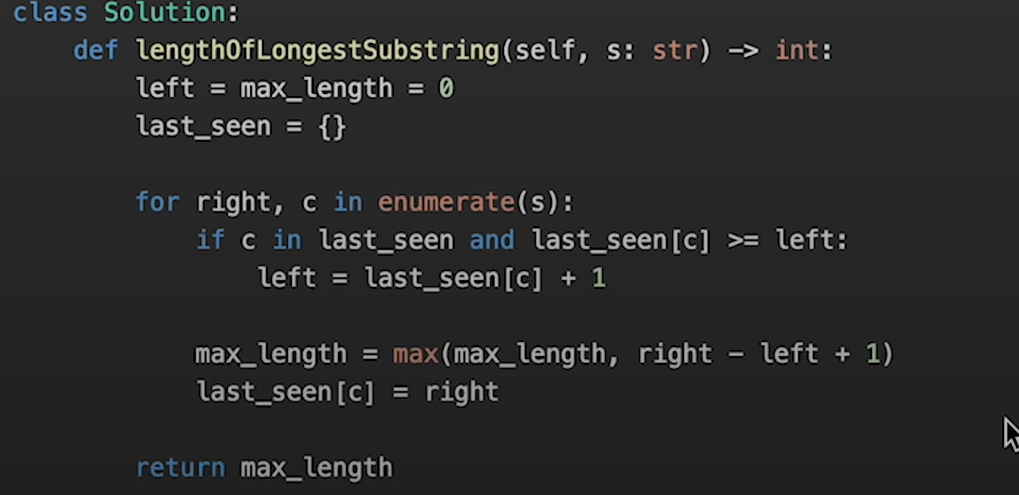

In [69]:
s="abcabcbb"
my_solution = Solution()
my_solution.lengthOfLongestSubstring(s)

0 0 a
0 0
0 1 b
0 1
0 2 c
0 2
0 3 a
1 3
1 4 b
2 4
2 5 c
3 5
3 6 b
5 6
5 7 b
7 7


3

In [114]:
def rotate_matrix_cw(matrix):
    size = len(matrix)
    new_matrix = [[0 for x in range(3)] for x in range(3)]
    for y in range(size):
        for x in range(size):
            new_y = x
            new_x = size-1-y
            new_matrix[new_x][new_y] = matrix[x][y]
    return new_matrix


In [115]:
matrix  = [[1, 2, 3],
            [4, 5, 6],
            [7, 8, 9]]

In [116]:
rotate_matrix_cw(matrix)


[[3, 6, 9], [2, 5, 8], [1, 4, 7]]

In [100]:

matrix  = [[1, 2, 3],
            [4, 5, 6],
            [7, 8, 9]]

class Solution:
    def rotate(self, matrix):
        """
        Do not return anything, modify matrix in-place instead.
        """
        self.transpose(matrix)
        self.reflect(matrix)
        
    def transpose(self, matrix):
        for i in range(len(matrix)):
            for j in range(i+1, len(matrix)):
                print(i,j)
                matrix[j][i], matrix[i][j] = matrix[i][j],matrix[j][i]
                
                
    def reflect(self, matrix):
        n = len(matrix)
        for i in range(n):
            for j in range(n // 2):
                matrix[i][j], matrix[i][-j - 1] = matrix[i][-j - 1], matrix[i][j]

In [101]:
my_soln = Solution()


In [102]:
my_soln.transpose(matrix)

0 1
0 2
1 2


In [103]:
matrix

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]

In [104]:
my_soln.reflect(matrix)

In [105]:
matrix

[[7, 4, 1], [8, 5, 2], [9, 6, 3]]

In [117]:
nums1 = [1,3]
nums2 = [2]

nums1_idx = 0
nums2_idx = 0

merged_list = []
len_nums1 = len(nums1)
len_nums2 = len(nums2)
len_merged = len_nums1+len_nums2

if ((nums1_idx < len_nums1) and (nums2_idx < len_nums2)):
    if nums1[nums1_idx] <= nums2[nums2_idx]:
        merged_list.append(nums1[nums1_idx])
        nums1_idx+=1
        
    else:
        merged_list.append(nums2[nums2_idx])
        nums2_idx+=1
elif ()
    




if (len_merged%2==1):
    return merged_list[len_merged//2]
else:
    return ((merged_list[len_merged//2] + merged_list[len_merged//2]))/2.0
    



1 0
1 1


IndexError: list index out of range